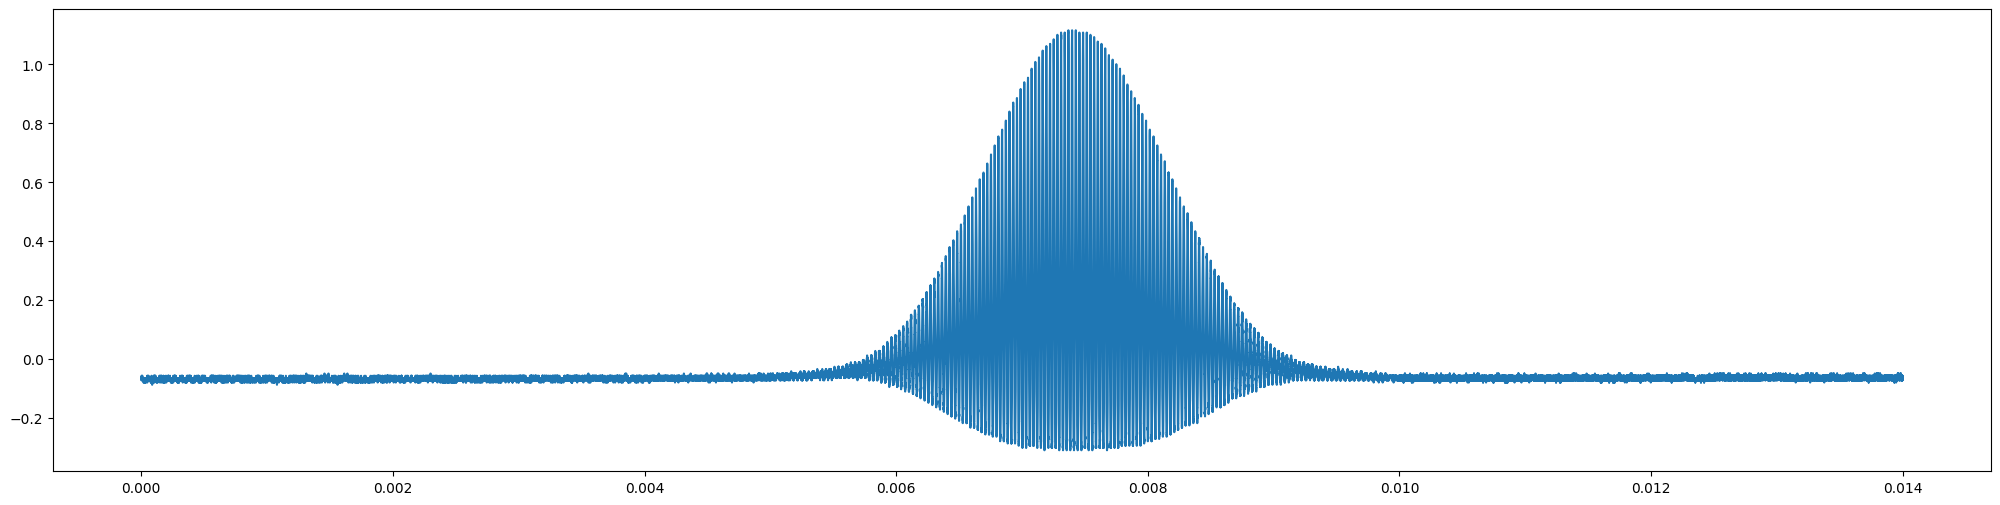

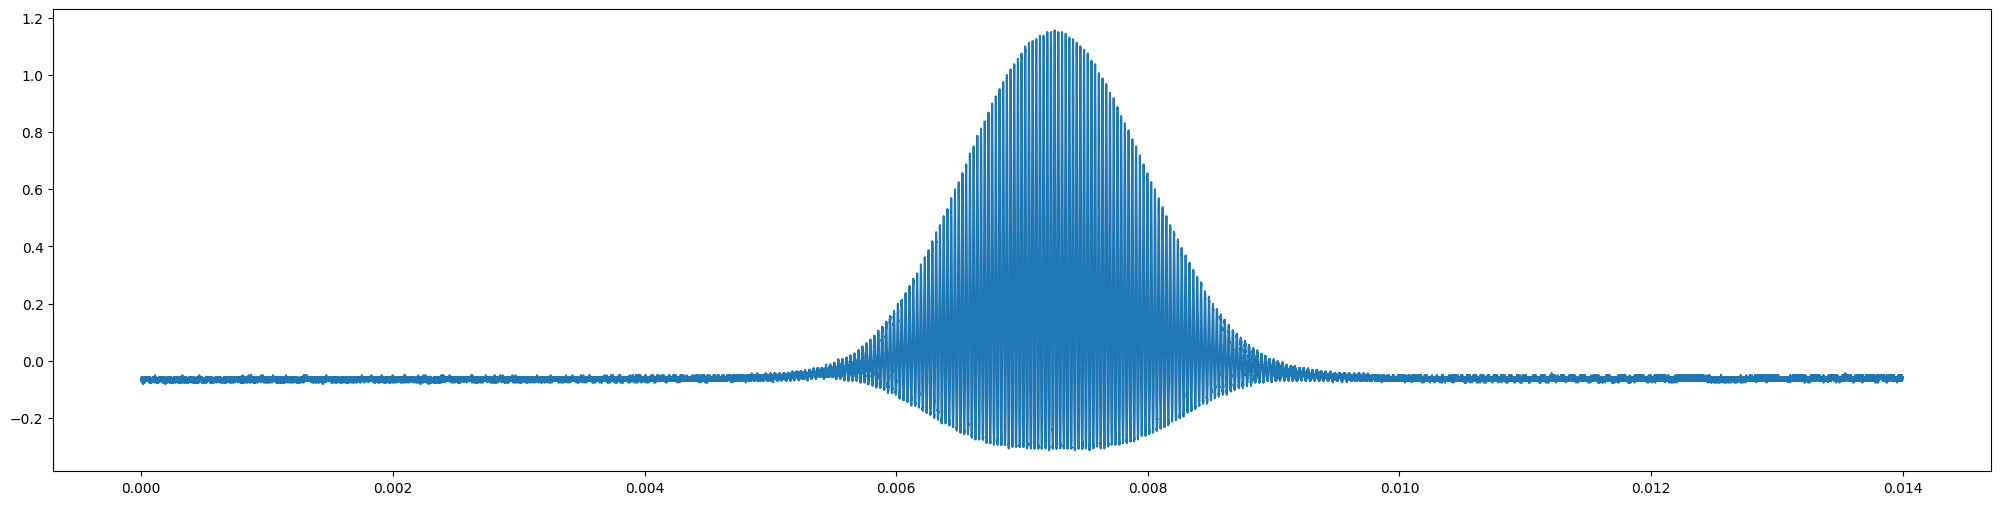

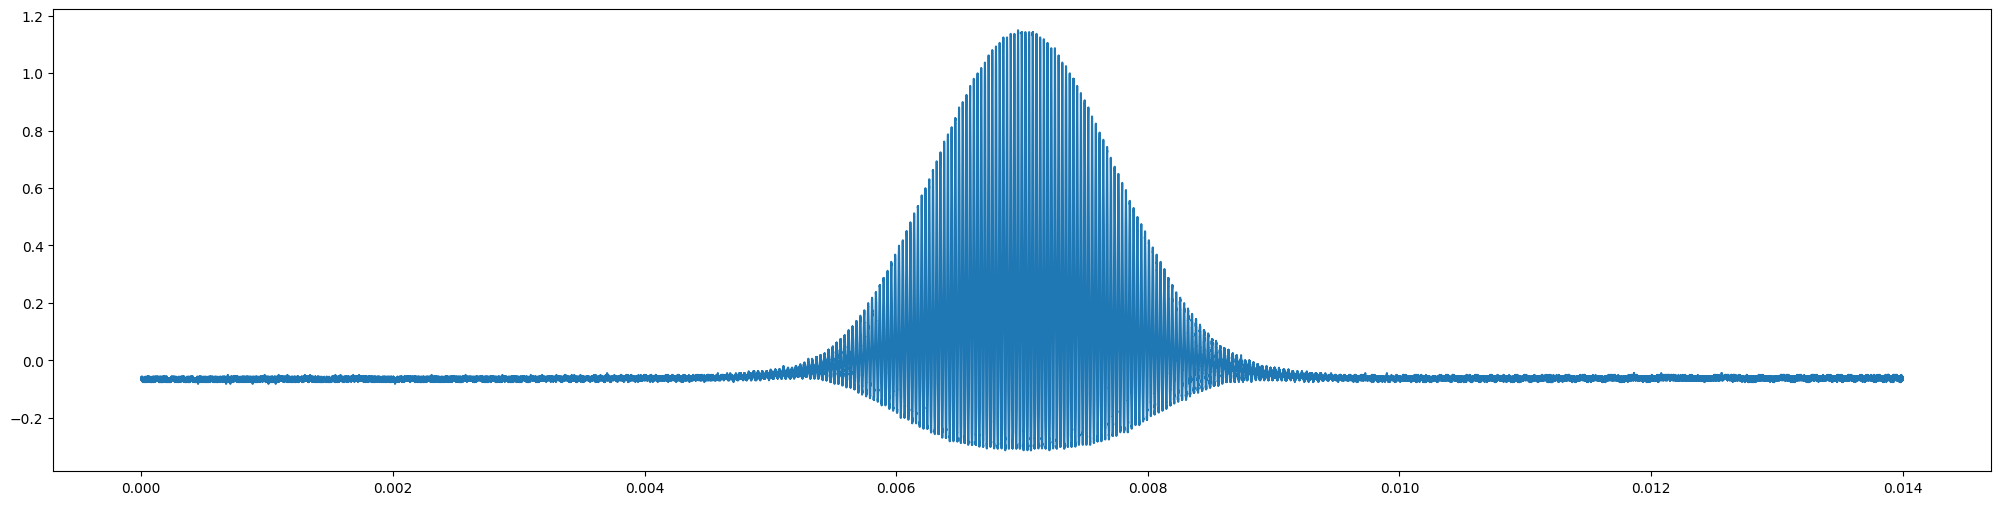

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

output_path = '/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/code/output/'

#load the data
unscalled_time_1,intensity_1 = np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/nach1", delimiter=',', unpack = True)
unscalled_time_2,intensity_2 = np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/nach2", delimiter=',', unpack = True)
unscalled_time_3,intensity_3 = np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/nach3", delimiter=',', unpack = True)



plt.figure(figsize = (25,6))
plt.plot(unscalled_time_1,intensity_1)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_2,intensity_2)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_3,intensity_3)


The basic function to fit the data with all the data to change

In [35]:
def initial_func(t,A,B,C,Ω,w,t_0, O):

    I_1 = 1 + A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O

#### 1st data (nach1)

Same function with most of the parameters fixed, only t_0 and Ω are adjustable

0.007369
[7.85218291e-03 2.10742504e+05]
0.007418999999999999 215742.50418021274
error nach1 [3.17319458e-06 5.66078081e-01]


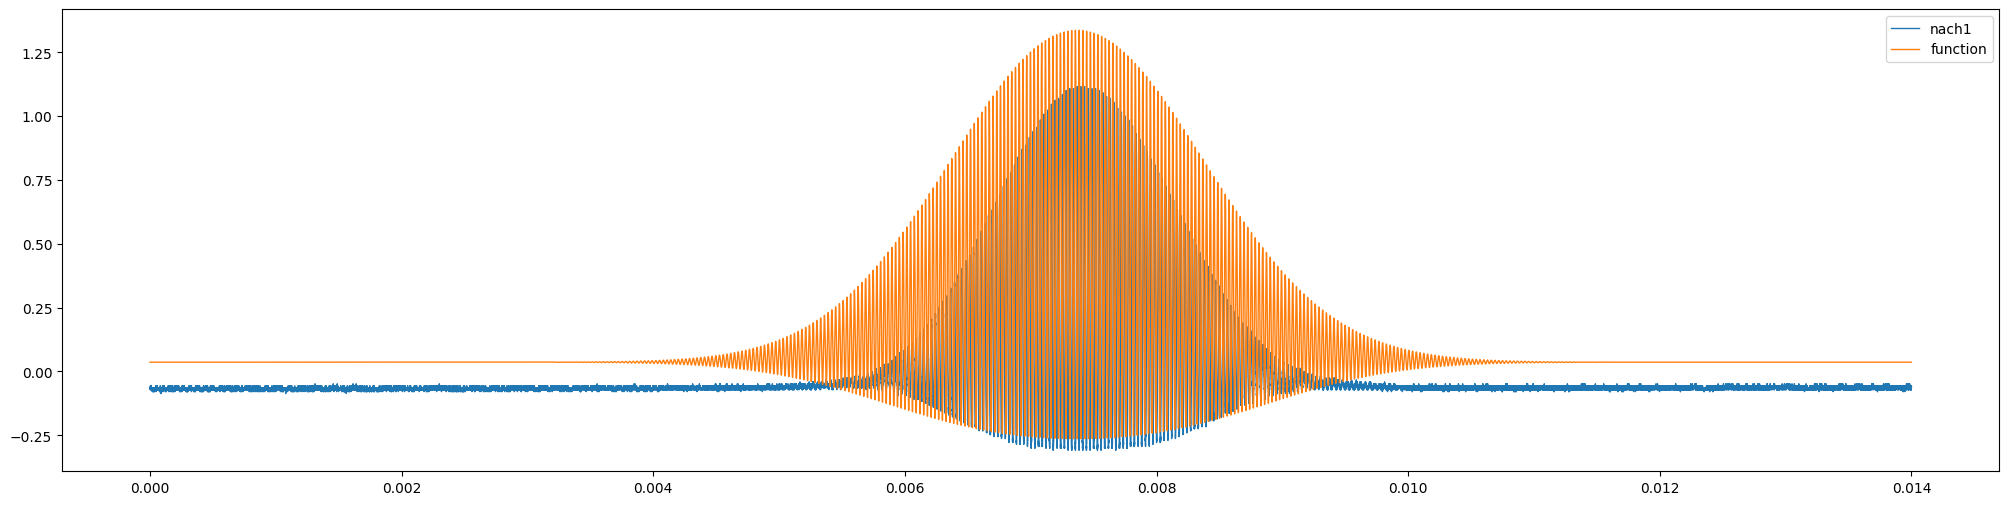

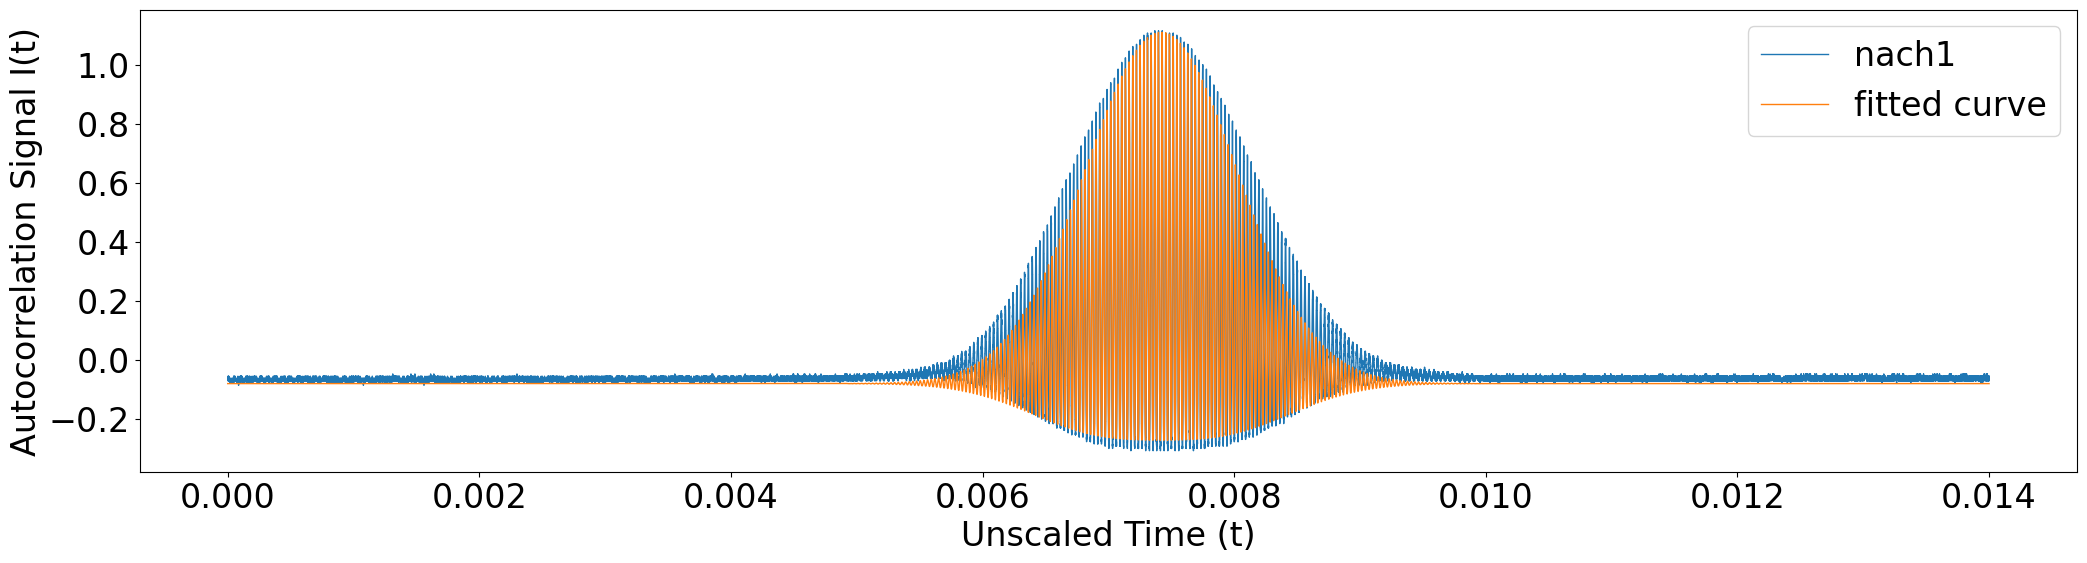

In [36]:
def function_2_1(t,t_0,Ω):

    A,B,C,w,O = [2.87611006e-01, 1.72994251e-01, 1.06049115e-01, 9.30945097e-04,1.08110740e+00]
    I_1 = 1 + (A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2)))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O

t00,Ω0,w0,A0,B0,C0,O0 = unscalled_time_1[np.argmax(intensity_1)],211000,0.00154,0.5,.2,0,1-intensity_1[-1]-0.1
print(unscalled_time_1[np.argmax(intensity_1)])

# use just the function
y_1 = initial_func(unscalled_time_1,A0,B0,C0,Ω0,w0,t00,O0)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_1,intensity_1,lw = 1, label = "nach1")
plt.plot(unscalled_time_1,y_1,lw = 1, label = "function")
plt.legend()

# fitting the function
initial_guess_1 = [A0,B0,C0,Ω0,w0,t00,O0]
fitting_param_1, covariance_matrix_1 = curve_fit(initial_func, unscalled_time_1, intensity_1, p0 = initial_guess_1)
A,B,C,Ω,w,t,O = fitting_param_1
errors_1 = np.sqrt(np.diag(covariance_matrix_1))
fitting_output_1 = initial_func(unscalled_time_1,A,B,C,Ω,w,t,O)

# using new function with some fixed variables, free t_0 and Ω
w = 0.00139
z_1 = function_2_1(unscalled_time_1,t,2.11032718e+05)

#fitting 2nd time with new function
initial_guess_1_2 = [unscalled_time_1[np.argmax(intensity_1)],2.11032718e+05]
fitting_param_1_2, covariance_matrix_1_2 = curve_fit(function_2_1, unscalled_time_1, intensity_1, p0 = initial_guess_1_2)
t,Ω = fitting_param_1_2
print(fitting_param_1_2)
fitting_output_1_2 = function_2_1(unscalled_time_1,unscalled_time_1[np.argmax(intensity_1)]+.00005,Ω+5000)
print(unscalled_time_1[np.argmax(intensity_1)]+.00005,Ω+5000)
print("error nach1",np.sqrt(np.diag(covariance_matrix_1_2)))

plt.figure(figsize = (25,6))
#plt.xlim(0.0058,0.009)
plt.plot(unscalled_time_1,intensity_1,lw = 1, label = "nach1")
#plt.plot(unscalled_time_1,z_1,lw = 1, label = "directly using function_2")
#plt.plot(unscalled_time_1,fitting_output_1,lw = 1, label = "curve fitting using function_1")
plt.plot(unscalled_time_1,fitting_output_1_2,lw = 1, label = "fitted curve")
plt.xlabel("Unscaled Time (t)",fontsize=24)
plt.ylabel("Autocorrelation Signal I(t)",fontsize=24)
plt.xticks(fontsize=24)  # Set font size for x-axis ticks
plt.yticks(fontsize=24)  # Set font size for y-axis ticks
plt.legend(fontsize=24)  # Set font size for legend
plt.legend(fontsize=24)
plt.savefig(output_path+"fitted_nach1.jpg")

#### 2nd data (nach2)

0.0072598
[3.18305079e-01 1.53427349e-01 5.74355931e-02 2.11283683e+05
 5.33464897e-04 7.58836954e-03 1.03844268e+00]
0.0072598 217255.34931363503


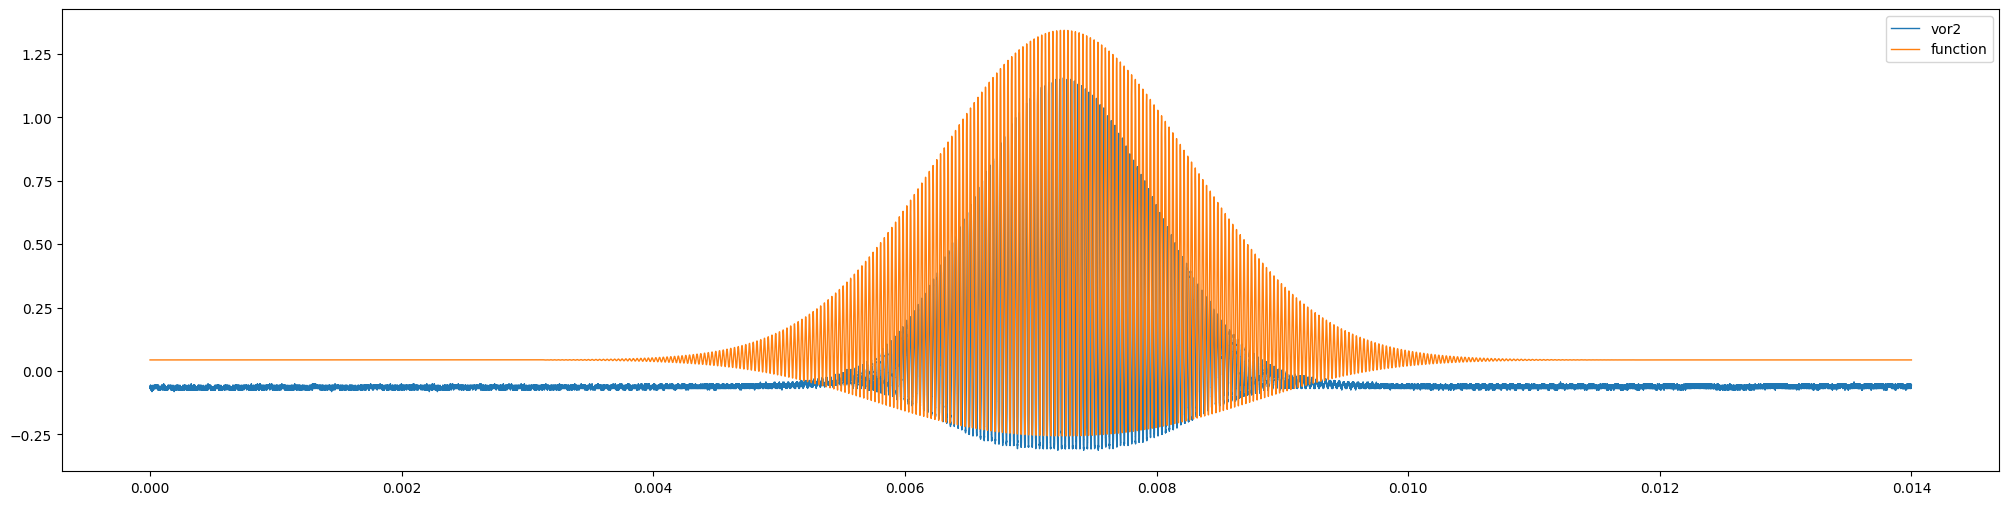

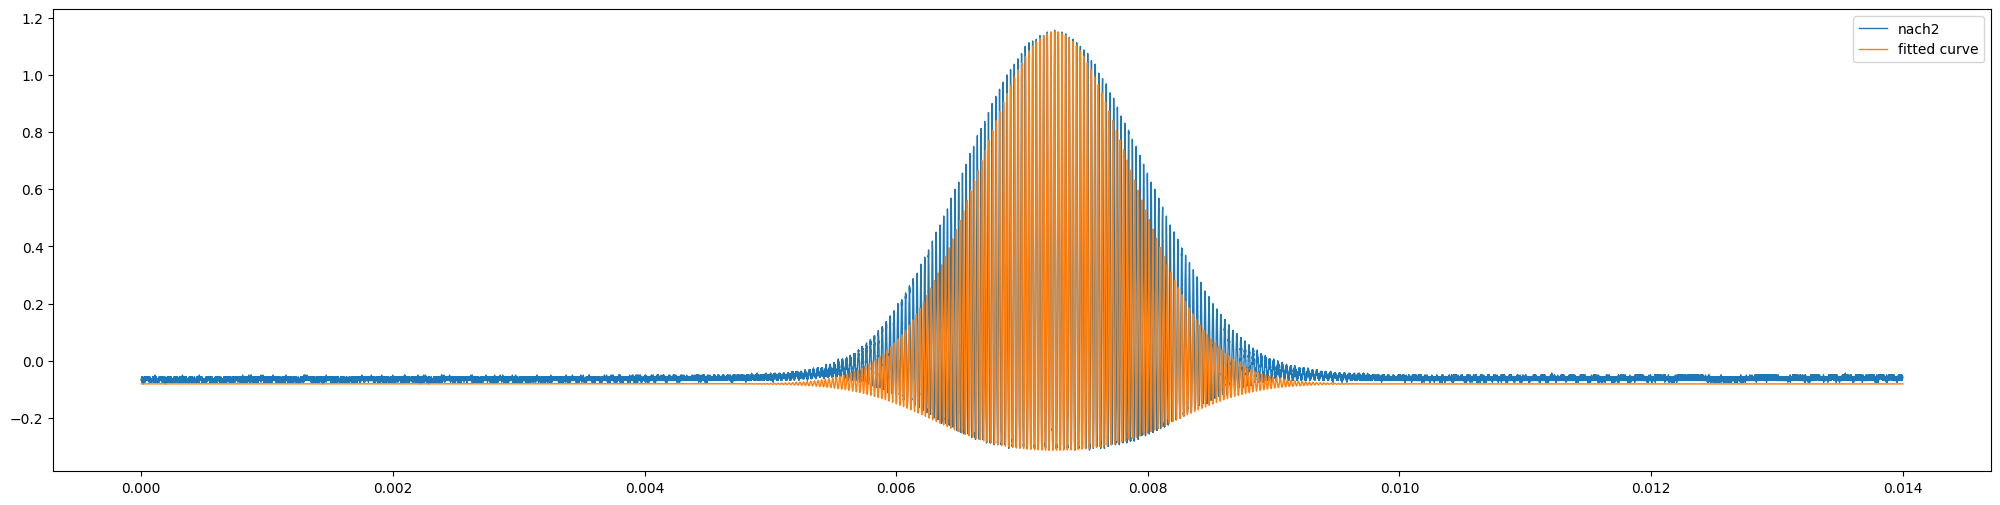

In [37]:
def function_2_2(t,t_0,Ω):

    A,B,C,w,O = [2.87611006e-01, 1.83004251e-01, 1.06049115e-01, 9.30945097e-04,1.08110740e+00]
    I_1 = 1 + (A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2)))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O


t00,Ω0,w0,A0,B0,C0,O0 = unscalled_time_2[np.argmax(intensity_2)],211000,0.00154,0.5,.2,0,1-intensity_2[-1]-0.1
print(unscalled_time_2[np.argmax(intensity_2)])

initial_guess_2 = [A0,B0,C0,Ω0,w0,t00,O0]
y_2 = initial_func(unscalled_time_2,A0,B0,C0,Ω0,w0,t00,O0)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_2,intensity_2,lw = 1, label = "vor2")
plt.plot(unscalled_time_2,y_2,lw = 1, label = "function")
plt.legend()
#plt.savefig(output_path+"raw_vor2.jpg")

#fitting
fitting_param_2, covariance_matrix_2 = curve_fit(initial_func, unscalled_time_2, intensity_2, p0 = initial_guess_2)

print(fitting_param_2)
#print(np.sqrt(np.diag(covariance_matrix)))

# parameters
A,B,C,Ω,w,t,O = fitting_param_2
errors_2 = np.sqrt(np.diag(covariance_matrix_2))

fitting_output_2 = initial_func(unscalled_time_2,A,B,C,Ω,w,t,O)

z_2 = function_2_2(unscalled_time_2,unscalled_time_2[np.argmax(intensity_2)],Ω)

#fitting
initial_guess_2_2 = [t,Ω]
fitting_param_2_2, covariance_matrix_2_2 = curve_fit(function_2_2, unscalled_time_2, intensity_2, p0 = initial_guess_2_2)
t,Ω = fitting_param_2_2
fitting_output_2_2 = function_2_2(unscalled_time_2,unscalled_time_2[np.argmax(intensity_2)],Ω+6000)
print(unscalled_time_2[np.argmax(intensity_2)],Ω+6000)

plt.figure(figsize = (25,6))
#plt.xlim(0.0058,0.009)
plt.plot(unscalled_time_2,intensity_2,lw = 1, label = "nach2")
#plt.plot(unscalled_time_2,z_2,lw = 1, label = "fitted_2_2")
#plt.plot(unscalled_time_2,fitting_output_2,lw = 1, label = "fitted_2")
plt.plot(unscalled_time_2,fitting_output_2_2,lw = 1, label = "fitted curve")
plt.legend()
plt.savefig(output_path+"fitted_nach2.jpg")

#### 3rd data (nach3)

0.0069688
[3.33044823e-01 1.48653563e-01 4.82431599e-02 2.11079031e+05
 5.93374773e-04 7.30385314e-03 1.04130560e+00]
0.0069688
0.0070288 211044.85219767207


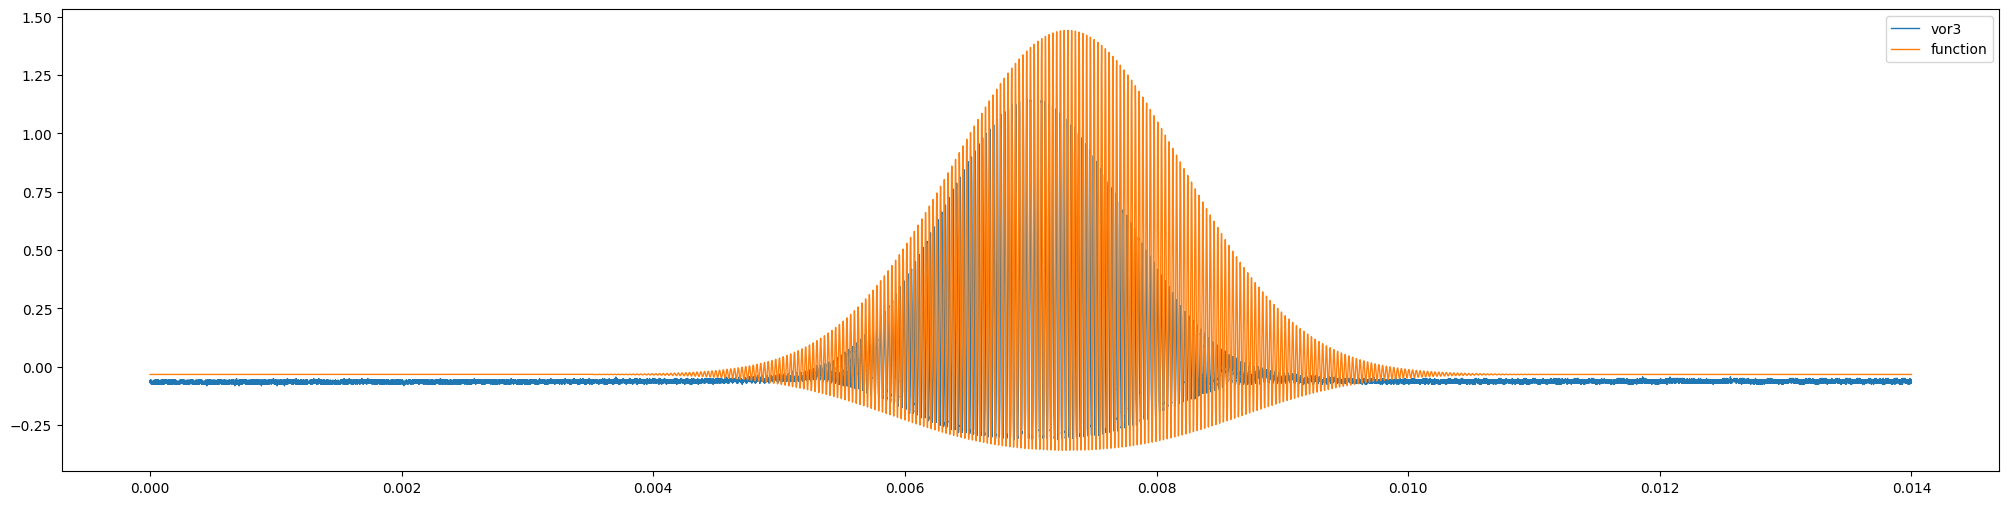

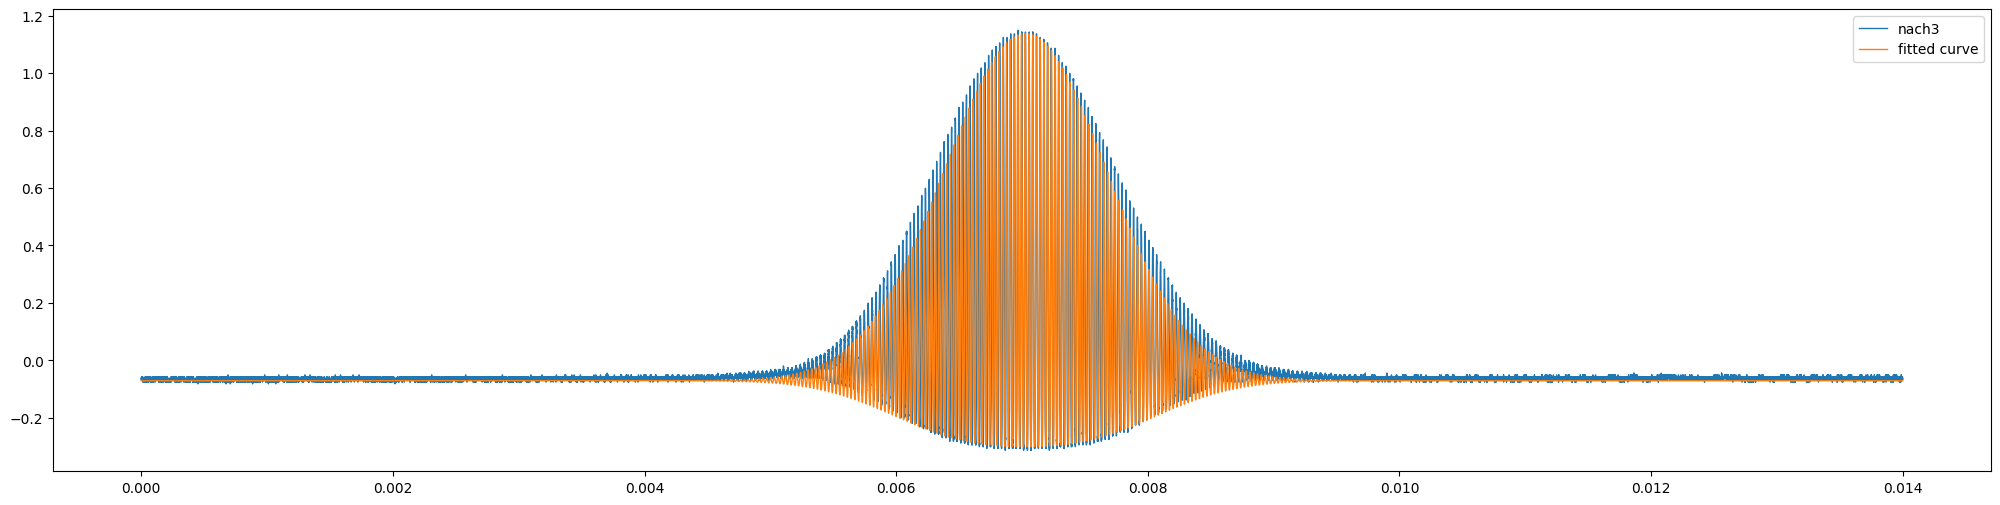

In [38]:
def function_2_3(t,t_0,Ω):

    A,B,C,w,O = [.237611006, 1.79994251e-01, 1.26049115e-01, 9.90945097e-04,1.07110740e+00]
    I_1 = 1 + (A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2)))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O


t00,Ω0,w0,A0,B0,C0,O0 = 0.00729,211000,0.0014,.575,.225,0.00,1-intensity_3[-1]-0.03
print(unscalled_time_3[np.argmax(intensity_3)])

initial_guess_3 = [A0,B0,C0,Ω0,w0,t00,O0]
y_3 = initial_func(unscalled_time_3,A0,B0,C0,Ω0,w0,t00,O0)

plt.figure(figsize = (25,6))
plt.plot(unscalled_time_3,intensity_3,lw = 1, label = "vor3")
plt.plot(unscalled_time_3,y_3,lw = 1, label = "function")
plt.legend()
#plt.savefig(output_path+"raw_vor3.jpg")

#fitting
fitting_param_3, covariance_matrix_3 = curve_fit(initial_func, unscalled_time_3, intensity_3, p0 = initial_guess_3)

print(fitting_param_3)
#print(np.sqrt(np.diag(covariance_matrix)))

# parameters
A,B,C,Ω,w,t,O = fitting_param_3
errors_3 = np.sqrt(np.diag(covariance_matrix_3))

fitting_output_3 = initial_func(unscalled_time_3,A,B,C,Ω,w,t,O)

z_3 = function_2_3(unscalled_time_3,unscalled_time_3[np.argmax(intensity_3)]+.000075,Ω)
print(unscalled_time_3[np.argmax(intensity_3)])
#fitting
initial_guess_3_2 = [t,Ω]
fitting_param_3_2, covariance_matrix_3_2 = curve_fit(function_2_3, unscalled_time_3, intensity_3, p0 = initial_guess_3_2)
t,Ω = fitting_param_3_2
fitting_output_3_2 = function_2_3(unscalled_time_3,unscalled_time_3[np.argmax(intensity_3)]+.00006,Ω)
print(unscalled_time_3[np.argmax(intensity_3)]+.00006,Ω)

plt.figure(figsize = (25,6))
#plt.xlim(0.0057,0.0088)
plt.plot(unscalled_time_3,intensity_3,lw = 1, label = "nach3")
#plt.plot(unscalled_time_3,z_3,lw = 1, label = "vor3_3")
#plt.plot(unscalled_time_3,fitting_output_3,lw = 1, label = "fitted_3")
plt.plot(unscalled_time_3,fitting_output_3_2,lw = 1, label = "fitted curve")
plt.legend()
plt.savefig(output_path+"fitted_nach3.jpg")

#### finding the w (FWHM) using different method
The method is to plot a gaussina with the local maxima of each curve, then draw a gaussian, then fin the width (w) of that gaussian curve

[1.17343191 0.00118016 0.00743215 0.05440589]
error of nach1 [9.63639882e-04 1.16606531e-06 6.66190872e-07 2.71988120e-04]
[9.26078920e-04 1.07843803e-06 6.07759236e-07 2.57865996e-04]
[1.20942272e+00 1.17863404e-03 7.26209772e-03 5.30565684e-02]
[1.03463454e-03 1.21712043e-06 6.90674745e-07 2.90812988e-04]
[1.20550228e+00 1.18421584e-03 7.02375797e-03 5.42966821e-02]
nach1: w =  0.0011801555258520986
nach2: w =  0.0011786340426098742
nach3: w =  0.0011842158394374815


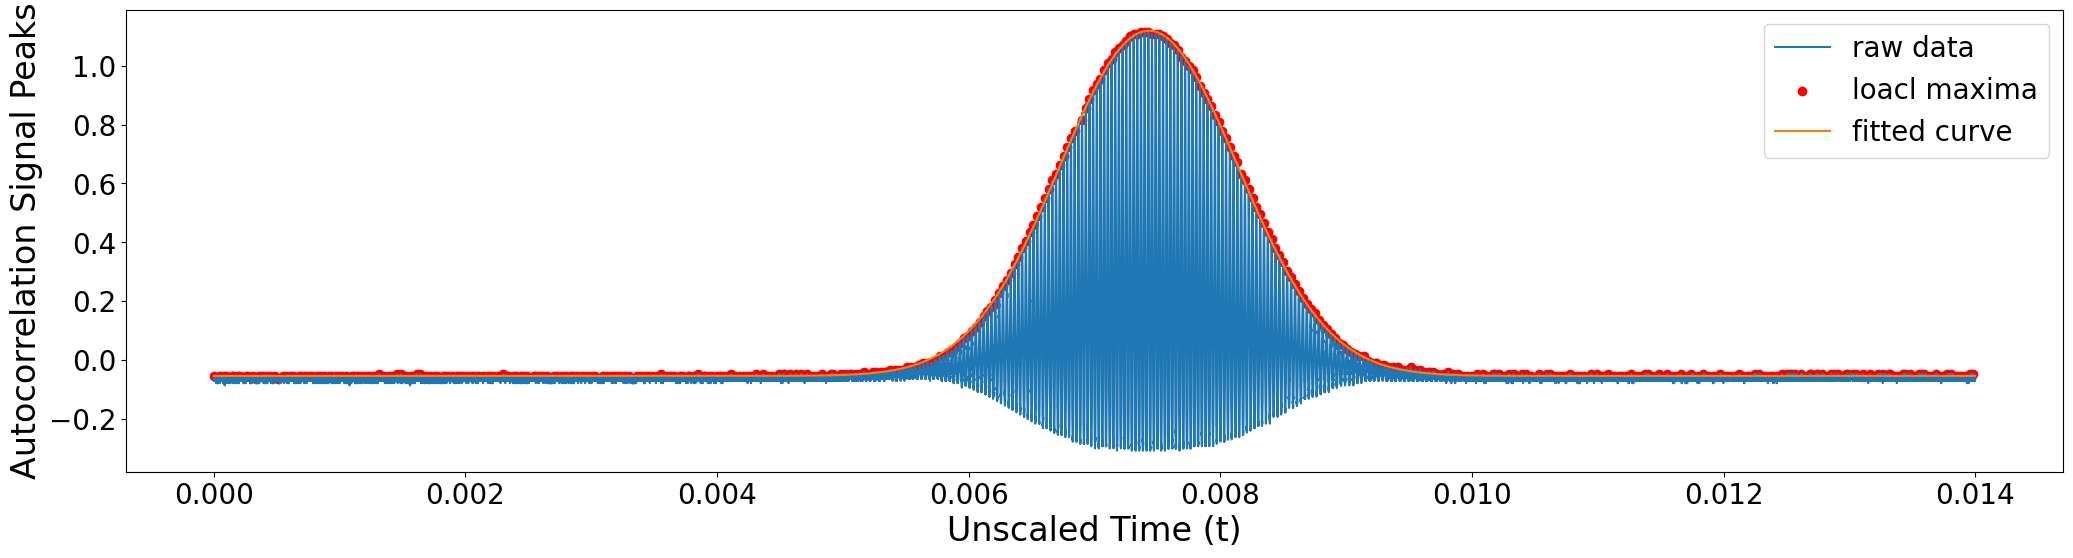

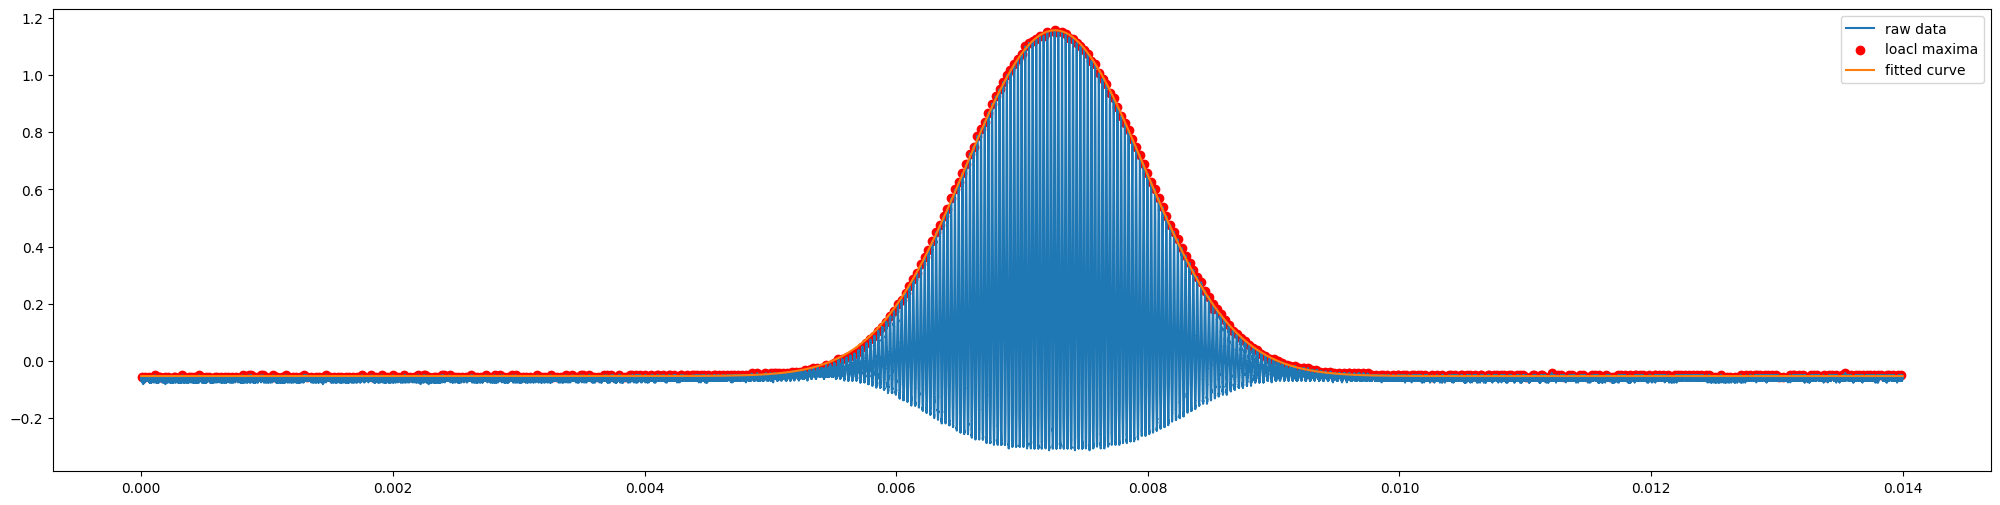

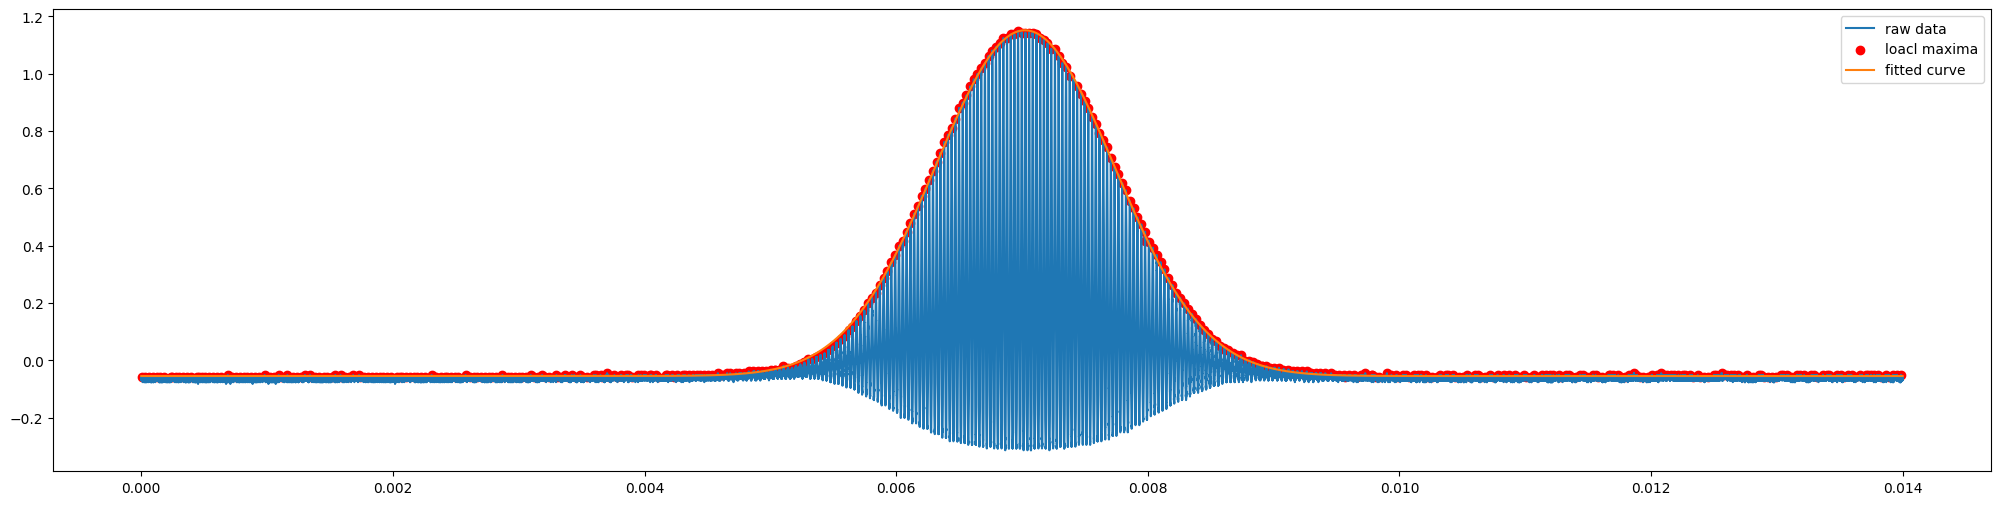

In [39]:
## finding the local maxima
# Method 2: Assumes periodicity of 170 points (identified manually)
def maxfn(x,I,n):

    maxim = []
    x_ = []
    #n = 0
    
    for i in range(0,len(x),n):
        m = I[i:i+n]
        k = np.argmax(m)
        p = i + k
        maxim.append(I[p])
        x_.append(x[p])
        #n += 1
    return x_,maxim
            
# function for gaussian curve
def gauss(t,A,w,t_0,O):
    return A*np.exp(-2*np.log(2)*((t-t_0)**2)/(w**2)) - O


### ------------------- nach1 --------------------
# get the coordinates of the local maxima using maxfn
gauss_x_vor1, gauss_y_vor1 = maxfn(unscalled_time_1,intensity_1,150)

# fit the local maxima curve
gauss_fitting_param_vor1, gauss_fitting_param_error_vor1 = curve_fit(gauss, gauss_x_vor1, gauss_y_vor1, p0 = [1.25, 0.00139, 0.00729, 0.2])
print(gauss_fitting_param_vor1)
print("error of nach1",np.sqrt(np.diag(gauss_fitting_param_error_vor1)))
gauss_fitted_out_vor1 = gauss(unscalled_time_1, gauss_fitting_param_vor1[0], gauss_fitting_param_vor1[1], gauss_fitting_param_vor1[2], gauss_fitting_param_vor1[3])
plt.figure(figsize = (25,6))
#plt.xlim(0.0047,0.0098)
plt.plot(unscalled_time_1,intensity_1, label = "raw data")
plt.scatter(gauss_x_vor1,gauss_y_vor1, c="red", label="loacl maxima")
plt.plot(unscalled_time_1,gauss_fitted_out_vor1, label="fitted curve")
plt.xlabel("Unscaled Time (t)",fontsize=24)
plt.ylabel("Autocorrelation Signal Peaks",fontsize=24)
plt.xticks(fontsize=20)  # Set font size for x-axis ticks
plt.yticks(fontsize=20)  # Set font size for y-axis ticks
plt.legend(fontsize=20)  # Set font size for legend
plt.legend(fontsize=20)
plt.savefig(output_path+"Gaussian_fitted_nach1.jpg")

### ------------------- nach2 --------------------
# get the coordinates of the local maxima using maxfn
gauss_x_vor2, gauss_y_vor2 = maxfn(unscalled_time_2,intensity_2,150)

# fit the local maxima curve
gauss_fitting_param_vor2, gauss_fitting_param_error_vor2 = curve_fit(gauss, gauss_x_vor2, gauss_y_vor2, p0 = [1.25, 0.00139, 0.00729, 0.2])
print(np.sqrt(np.diag(gauss_fitting_param_error_vor2)))
print(gauss_fitting_param_vor2)
gauss_fitted_out_vor2 = gauss(unscalled_time_2, gauss_fitting_param_vor2[0], gauss_fitting_param_vor2[1], gauss_fitting_param_vor2[2], gauss_fitting_param_vor2[3])
plt.figure(figsize = (25,6))
#plt.xlim(0.0047,0.0098)
plt.plot(unscalled_time_2,intensity_2, label = "raw data")
plt.scatter(gauss_x_vor2,gauss_y_vor2, c="red", label="loacl maxima")
plt.plot(unscalled_time_2,gauss_fitted_out_vor2, label="fitted curve")
plt.legend()
plt.savefig(output_path+"Gaussian_fitted_nach2.jpg")


### ------------------- nach3 --------------------
# get the coordinates of the local maxima using maxfn
gauss_x_vor3, gauss_y_vor3 = maxfn(unscalled_time_3,intensity_3,150)

# fit the local maxima curve
gauss_fitting_param_vor3, gauss_fitting_param_error_vor3 = curve_fit(gauss, gauss_x_vor3, gauss_y_vor3, p0 = [1.25, 0.00139, 0.00729, 0.2])
print(np.sqrt(np.diag(gauss_fitting_param_error_vor3)))
print(gauss_fitting_param_vor3)
gauss_fitted_out_vor3 = gauss(unscalled_time_3, gauss_fitting_param_vor3[0], gauss_fitting_param_vor3[1], gauss_fitting_param_vor3[2], gauss_fitting_param_vor3[3])
plt.figure(figsize = (25,6))
#plt.xlim(0.0047,0.0098)
plt.plot(unscalled_time_3,intensity_3, label = "raw data")
plt.scatter(gauss_x_vor3,gauss_y_vor3,c="red", label="loacl maxima")
plt.plot(unscalled_time_3,gauss_fitted_out_vor3, label="fitted curve")
plt.legend()
plt.savefig(output_path+"Gaussian_fitted_nach3.jpg")

print("nach1: w = ",gauss_fitting_param_vor1[1] )
print("nach2: w = ",gauss_fitting_param_vor2[1] )
print("nach3: w = ",gauss_fitting_param_vor3[1] )


### Parameters all togather

In [40]:
# ----------- parameters for table
#A,B,C,w,O = [2.87611006e-01, 2.21994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
fitting_parameters_1_for_table = np.array([2.87611006e-01, 2.21994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00,fitting_param_1_2[0],fitting_param_1_2[1]])
#A,B,C,w,O = [3.17611006e-01, 2.11994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
fitting_parameters_2_for_table = np.array([3.17611006e-01, 2.11994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00,fitting_param_2_2[0],fitting_param_2_2[1]])
#A,B,C,w,O = [.297611006, 2.23994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
fitting_parameters_3_for_table = np.array([.297611006, 2.23994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00,fitting_param_3_2[0],fitting_param_3_2[1]])


In [41]:
all_parameters = np.array(["A", "B", "C", "w", "O", "t", "Ω"])

# Combine arrays into a list of lists
data = list(zip(all_parameters,fitting_parameters_1_for_table,fitting_parameters_2_for_table,fitting_parameters_3_for_table))

# Create headers for the table
headers = ["Parameters","vor 1", "vor 2", "vor 3",]

# Generate LaTeX table code
latex_table = tabulate(data, headers, tablefmt="latex_raw")

# Print or save the LaTeX table code
print(latex_table)

print("end")

\begin{tabular}{lrrr}
\hline
 Parameters   &            vor 1 &            vor 2 &            vor 3 \\
\hline
 A            &      0.287611    &      0.317611    &      0.297611    \\
 B            &      0.221994    &      0.211994    &      0.223994    \\
 C            &      0.126049    &      0.126049    &      0.126049    \\
 w            &      0.000990945 &      0.000990945 &      0.000990945 \\
 O            &      1.08111     &      1.08111     &      1.08111     \\
 t            &      0.00785218  &      0.00762173  &      0.00728236  \\
 Ω            & 210743           & 211255           & 211045           \\
\hline
\end{tabular}
end
